https://jovian.ai/aakashns/python-sklearn-linear-regression

https://www.youtube.com/watch?v=hDKCxebp88A

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
from urllib.request import urlretrieve

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
urlretrieve(medical_charges_url, '../data/medical.csv')

('../data/medical.csv', <http.client.HTTPMessage at 0x1d5d8d5b310>)

In [4]:
medical_df = pd.read_csv('../data/medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Exploratory Analysis and Visualization

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'       

In [8]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,  #64 max age - 18 min age + 1
                   title='Distribution of Age'
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)'
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'gray'],
                   title='Annual Medical Charges'
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'gray'],
                   title='Annual Medical Charges'
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.scatter(medical_df,
                   x='age',
                   y='charges',
                   color='smoker',
                   opacity=0.8,
                   hover_data=['sex'],
                   title='Age v. Charges',
                   )
fig.update_traces(marker_size=5)
fig.show()

In [13]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [14]:
fig = px.scatter(medical_df,
                   x='bmi',
                   y='charges',
                   color='smoker',
                   opacity=0.8,
                   hover_data=['sex'],
                   title='BMI v. Charges',
                   )
fig.update_traces(marker_size=5)
fig.show()

In [15]:
px.violin(medical_df, x='children', y='charges')

In [16]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [17]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [18]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [19]:
smoker_values = { 'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [20]:
medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


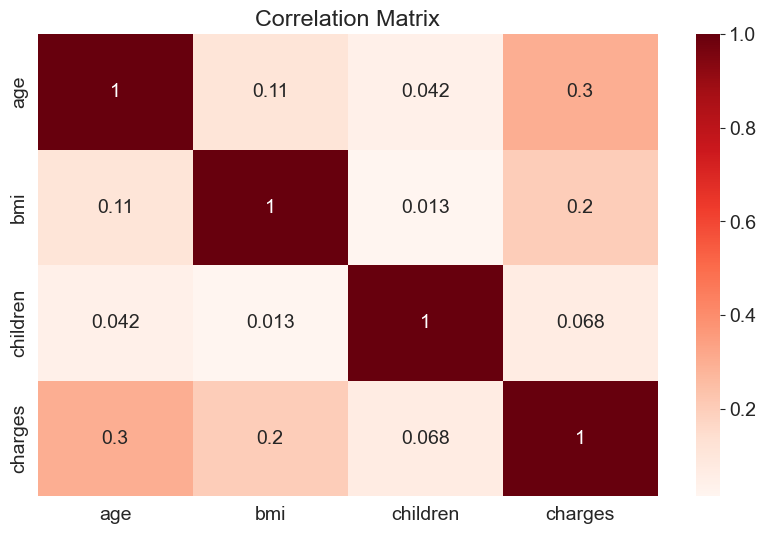

In [21]:
sns.heatmap(medical_df.select_dtypes(include='number').corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [22]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

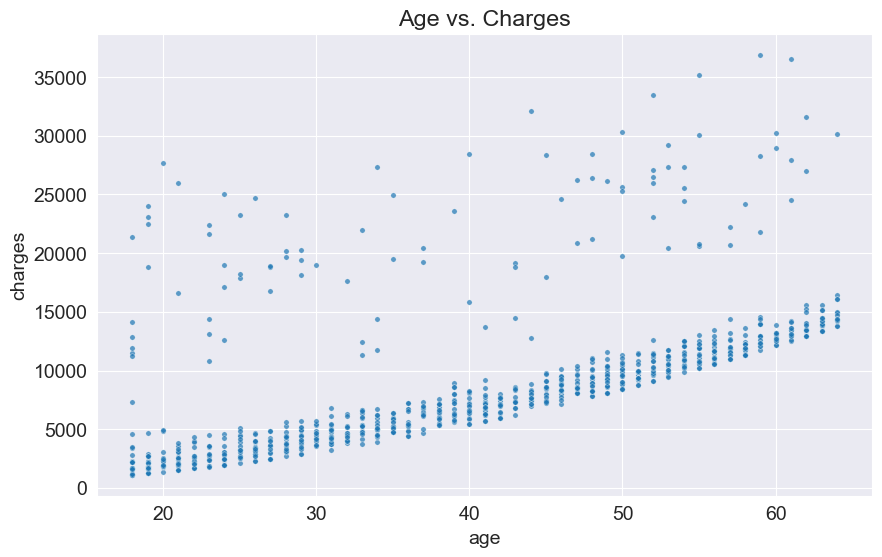

In [24]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [25]:
def estimate_charges(age, w, b):
    return w * age + b

In [26]:
w = 50
b = 100

In [27]:
estimate_charges(30, w, b)

1600

In [29]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

ValueError: x and y must have same first dimension, but have shapes (1064,) and (1,)

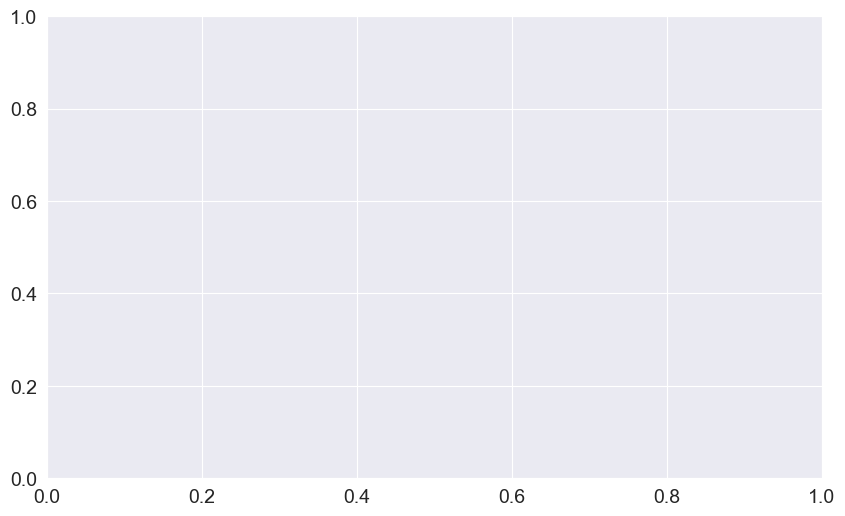

In [31]:
plt.plot(ages, estimate_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')